In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Text Processing

In [ ]:
import regex
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np

nltk.download('stopwords')
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')

def filter_text(text, stop_words):
    word_tokens = WordPunctTokenizer().tokenize(text.lower())
    filtered_text = [regex.sub('[^a-z ]+', '', w) for w in word_tokens]
    filtered_text = [regex.sub('[ ][ ]+', '', w) for w in filtered_text]
    filtered_text = [regex.sub('[0-9]', '', w) for w in filtered_text]
    filtered_text = [wordnet_lemmatizer.lemmatize(w, 'v') for w in filtered_text if not w in stop_words and len(w) > 2 and len(w) < 50]
    return " ".join(filtered_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Train Test Split

In [ ]:
df = pd.read_csv("preprocessed_text.csv")
df = df.dropna()

In [ ]:
df.head()

,Unnamed: 0,bug id,summary,severity,filtered_text,classification
0,0,365569,Remove workaround from bug 297227,normal,remove workaround bug,3
1,1,365578,Print Preview crashes on any URL in gtk2 builds,critical,print preview crash url gtk build,6
2,2,365582,Lines are not showing in table,major,line show table,4
3,3,365584,Firefox render ÛÏsimplified ArabicÛ font fa...,normal,firefox render simplify arabic font face incor...,3
4,4,365597,Crash [@ nsINodeInfo::NodeInfoManager],critical,crash nsinodeinfo nodeinfomanager,6


In [ ]:
temp_df, test_df = train_test_split(df, test_size=0.3, random_state = 42, stratify = df['classification'])
train_df, val_df = train_test_split(temp_df, test_size=0.2, random_state = 42, stratify = temp_df['classification'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english',  min_df = 2, max_features = 20000, use_idf = True)
x_train = tfidf.fit_transform(train_df['filtered_text'])
x_val = tfidf.transform(val_df['filtered_text'])
y_train = train_df['classification']
y_val = val_df['classification']

x_test = tfidf.transform(test_df['filtered_text'])
y_test = test_df['classification']

In [ ]:
pred_df = pd.read_csv("preprocessed_submission.csv")

val_vec = tfidf.fit_transform(df['filtered_text'])
test_vec = tfidf.transform(pred_df['filtered_text'].values.astype('U'))

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.57      0.02      0.05       169
           1       0.47      0.01      0.03       620
           2       1.00      0.00      0.01       434
           3       0.86      0.97      0.91     17618
           4       0.59      0.04      0.07       847
           5       0.50      0.01      0.02        98
           6       0.79      0.72      0.75      2612

    accuracy                           0.85     22398
   macro avg       0.68      0.25      0.26     22398
weighted avg       0.83      0.85      0.81     22398



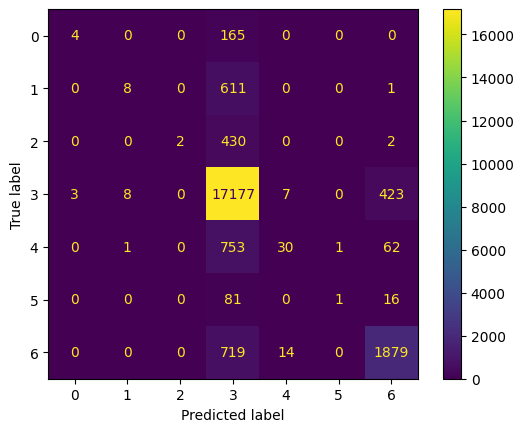

In [ ]:
model_lr = LogisticRegression(max_iter = 120).fit(x_train, y_train)
predicted = model_lr.predict(x_val)
print(classification_report(y_val, predicted))
cm = confusion_matrix(y_val, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_lr.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.50      0.00      0.01       361
           1       0.41      0.01      0.02      1328
           2       0.88      0.02      0.03       931
           3       0.86      0.97      0.91     37752
           4       0.65      0.04      0.07      1816
           5       0.75      0.01      0.03       210
           6       0.79      0.72      0.75      5597

    accuracy                           0.85     47995
   macro avg       0.69      0.25      0.26     47995
weighted avg       0.83      0.85      0.81     47995



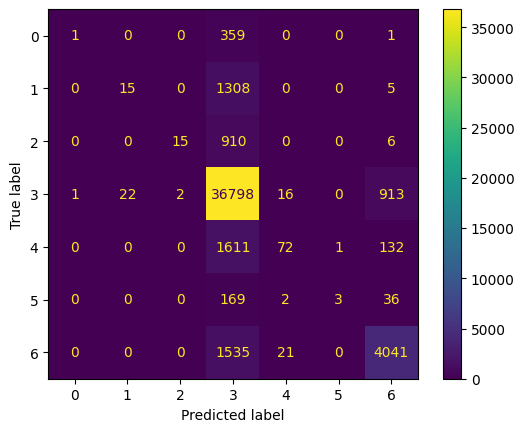

In [ ]:
predicted = model_lr.predict(x_test)
print(classification_report(y_test, predicted))
cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_lr.classes_)
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.04      0.30      0.07       169
           1       0.11      0.50      0.18       620
           2       0.05      0.29      0.09       434
           3       0.93      0.44      0.60     17618
           4       0.11      0.43      0.18       847
           5       0.04      0.30      0.07        98
           6       0.65      0.83      0.73      2612

    accuracy                           0.48     22398
   macro avg       0.28      0.44      0.27     22398
weighted avg       0.81      0.48      0.57     22398



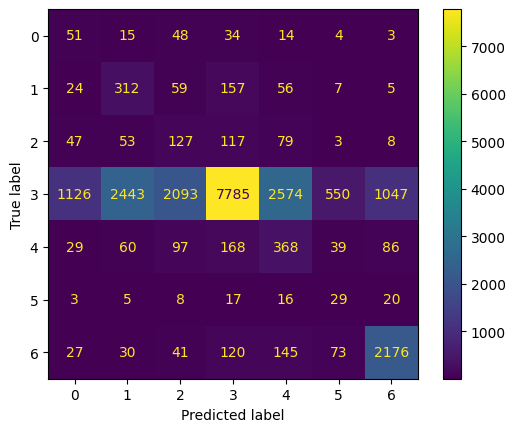

In [ ]:
model_lr = LogisticRegression(max_iter = 120, class_weight = 'balanced').fit(x_train, y_train)
predicted = model_lr.predict(x_val)
print(classification_report(y_val, predicted))
cm = confusion_matrix(y_val, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model_lr.classes_)
disp.plot()
plt.show()

In [ ]:
y_prob = model_lr.predict_proba(x_val)

In [ ]:
y_prob

array([[0.00177859, 0.00846767, 0.00915234, ..., 0.02310143, 0.00181024,
        0.00295892],
       [0.00279286, 0.0096977 , 0.01058855, ..., 0.01332735, 0.00229723,
        0.01805943],
       [0.00397344, 0.00825735, 0.00530922, ..., 0.01150943, 0.00440189,
        0.64440849],
       ...,
       [0.00558212, 0.00229954, 0.00221087, ..., 0.04076545, 0.02982514,
        0.00806189],
       [0.00373484, 0.01830417, 0.00979827, ..., 0.1039228 , 0.00536002,
        0.10453103],
       [0.00265941, 0.1313109 , 0.00803097, ..., 0.00488918, 0.00076359,
        0.00153364]])

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
y_onehot_test = label_binarizer.fit_transform(y_val)
y_onehot_test.shape  # (n_samples, n_classes)
y_score = label_binarizer.transform()

ValueError: Multioutput target data is not supported with label binarization

In [ ]:
len(y_score)

22398

In [ ]:
n_classes = 7
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.81


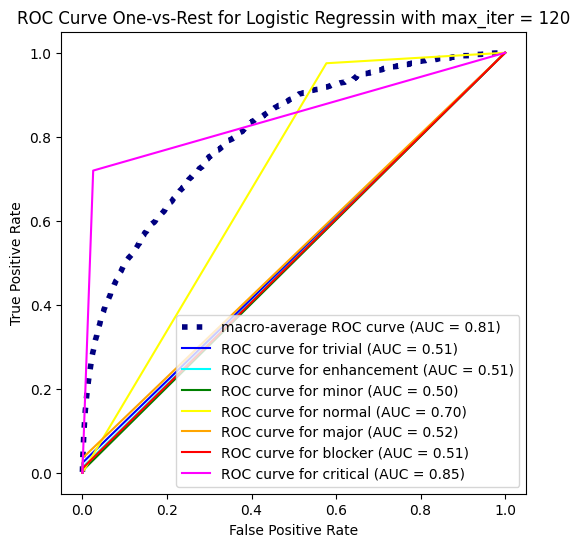

In [ ]:
from itertools import cycle
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["blue","cyan","green", "yellow","orange","red", "magenta"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {rm[class_id]}",
        color=color,
        ax=ax,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve One-vs-Rest for Logistic Regressin with max_iter = 120",
)

In [ ]:
y_test

48610     3
57648     3
138306    3
10937     3
110502    3
         ..
123025    3
59146     3
31451     3
12321     2
101605    3
Name: classification, Length: 47995, dtype: int64

In [ ]:
model_lr.fit(val_vec, df['classification'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=120)

In [ ]:
predicted = model_lr.predict(test_vec)

In [ ]:
rm = {0: "trivial",
      1: "enhancement",
     2: "minor",
     3: "normal",
     4: "major",
     5: "blocker",
     6: "critical"}

In [ ]:
pred_df["pred"] = predicted
res_df = pred_df[["bug id", "pred"]]
res_df = res_df.rename(columns={'bug id': 'bug_id'})
res_df["severity"] = res_df["pred"].apply(lambda x: rm[x])
res = res_df[["bug_id","severity"]]
res.set_index("bug_id", inplace=True)
print(np.unique(predicted, return_inverse=True, return_counts=True))

(array([0, 1, 3, 4, 5, 6]), array([2, 2, 2, ..., 5, 5, 2]), array([   17,    96, 78772,   109,    10,  7090]))


In [ ]:
res.head()

,severity
bug_id,
1143402,normal
1143405,normal
1143409,normal
1143411,normal
1143417,normal


In [ ]:
res.to_csv("logistic_regression_prediction.csv")

# RUSBoostClassifier

In [ ]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf = RUSBoostClassifier(estimator = DecisionTreeClassifier(max_features=20), n_estimators=200, algorithm='SAMME.R', sampling_strategy = 'not majority',
                              random_state=0)
clf.fit(x_train, y_train)

RUSBoostClassifier(estimator=DecisionTreeClassifier(max_features=20),
                   n_estimators=200, random_state=0,
                   sampling_strategy='not majority')

              precision    recall  f1-score   support

           1       1.00      0.01      0.01       620
           2       1.00      0.00      0.01       434
           3       0.79      1.00      0.89     17617
           4       0.95      0.02      0.04       848
           5       0.27      0.03      0.06        98
           6       1.00      0.00      0.00      2612

    accuracy                           0.79     22229
   macro avg       0.84      0.18      0.17     22229
weighted avg       0.83      0.79      0.70     22229



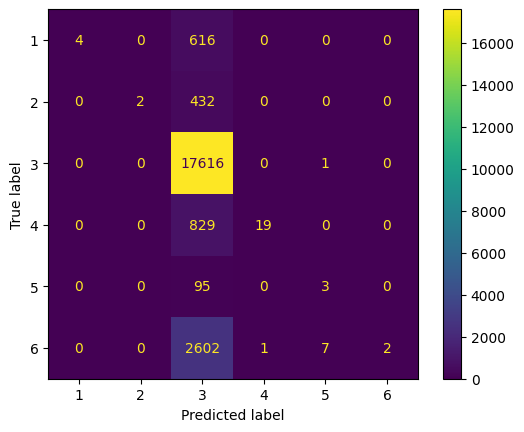

              precision    recall  f1-score   support

           1       1.00      0.00      0.01      1328
           2       1.00      0.01      0.01       931
           3       0.79      1.00      0.89     37752
           4       0.97      0.02      0.04      1816
           5       0.19      0.02      0.04       210
           6       0.83      0.00      0.00      5597

    accuracy                           0.79     47634
   macro avg       0.80      0.18      0.16     47634
weighted avg       0.81      0.79      0.70     47634



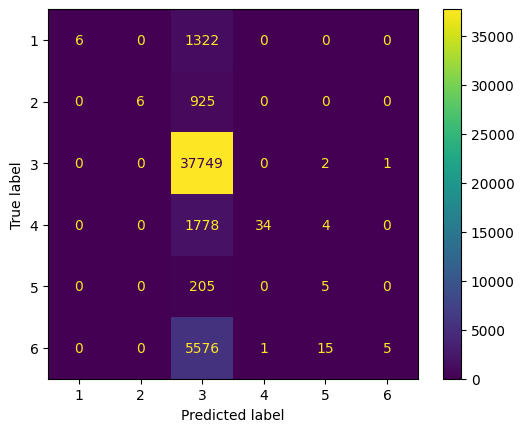

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted = clf.predict(x_val)
print(classification_report(y_val, predicted))


cm = confusion_matrix(y_val, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

predicted = clf.predict(x_test)
print(classification_report(y_test, predicted))

cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
clf.fit(val_vec, df['classification'])

RUSBoostClassifier(estimator=DecisionTreeClassifier(max_features=20),
                   n_estimators=200, random_state=0,
                   sampling_strategy='not majority')

In [ ]:
predicted = clf.predict(test_vec)

pred_df["pred"] = predicted
res_df = pred_df[["bug id", "pred"]]
res_df = res_df.rename(columns={'bug id': 'bug_id'})
res_df["severity"] = res_df["pred"].apply(lambda x: rm[x])
res = res_df[["bug_id","severity"]]
res.set_index("bug_id", inplace=True)
print(np.unique(predicted, return_inverse=True, return_counts=True))

(array([1, 3, 4, 5, 6]), array([1, 1, 1, ..., 1, 1, 1]), array([    8, 85969,    76,    19,    22]))


In [ ]:
res.to_csv("RUSBoost.csv")

RUSBoostClassifier with Logistic Regression

In [ ]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier

clf = RUSBoostClassifier(estimator = LogisticRegression(max_iter=120), n_estimators=200, algorithm='SAMME.R', sampling_strategy = 'not majority',
                              random_state=0)
clf.fit(x_train, y_train)

RUSBoostClassifier(estimator=LogisticRegression(max_iter=120), n_estimators=200,
                   random_state=0, sampling_strategy='not majority')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       169
           1       0.00      0.00      0.00       620
           2       0.00      0.00      0.00       434
           3       0.79      1.00      0.88     17618
           4       0.00      0.00      0.00       847
           5       0.00      0.00      0.00        98
           6       0.00      0.00      0.00      2612

    accuracy                           0.79     22398
   macro avg       0.11      0.14      0.13     22398
weighted avg       0.62      0.79      0.69     22398



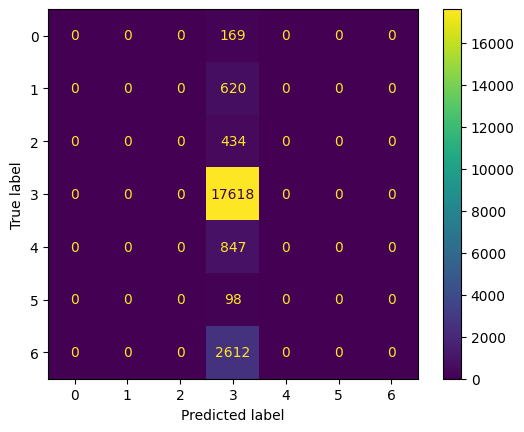

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       361
           1       0.00      0.00      0.00      1328
           2       0.00      0.00      0.00       931
           3       0.79      1.00      0.88     37752
           4       0.00      0.00      0.00      1816
           5       0.00      0.00      0.00       210
           6       0.00      0.00      0.00      5597

    accuracy                           0.79     47995
   macro avg       0.11      0.14      0.13     47995
weighted avg       0.62      0.79      0.69     47995



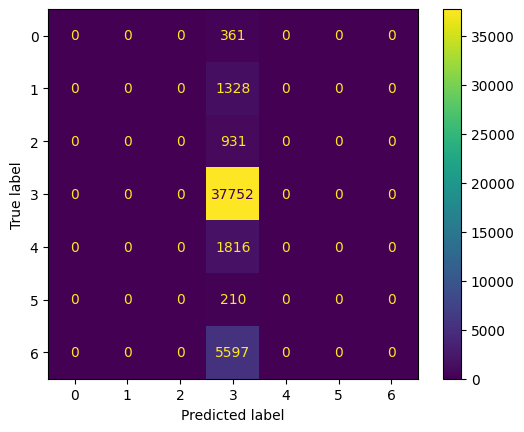

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predicted = clf.predict(x_val)
print(classification_report(y_val, predicted))


cm = confusion_matrix(y_val, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

predicted = clf.predict(x_test)
print(classification_report(y_test, predicted))

cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()